In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
# Read csv files and merge with carrier Description by carrier code
flight_data = pd.read_csv("Project1_Resources/three_quarters_mci_data.csv")
carrier = pd.read_csv("Project1_Resources/L_UNIQUE_CARRIERS.csv")
carrier
merge_carrier = pd.merge(flight_data, carrier, left_on="Marketing_Airline_Network", right_on="Code", how="left")
merge_carrier

,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,ArrDelayMinutes,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Code,Description
0,1,10,4,UA,SFO,"San Francisco, CA",MCI,"Kansas City, MO",38.0,46.0,0.0,0.0,0.0,46.0,0.0,0.0,UA,United Air Lines Inc.
1,1,10,4,UA,ORD,"Chicago, IL",MCI,"Kansas City, MO",60.0,48.0,0.0,48.0,0.0,0.0,0.0,0.0,UA,United Air Lines Inc.
2,1,10,4,UA,SFO,"San Francisco, CA",MCI,"Kansas City, MO",11.0,20.0,0.0,0.0,0.0,9.0,0.0,11.0,UA,United Air Lines Inc.
3,1,11,5,AS,SFO,"San Francisco, CA",MCI,"Kansas City, MO",0.0,55.0,0.0,0.0,0.0,55.0,0.0,0.0,AS,Alaska Airlines Inc.
4,1,11,5,AS,SAN,"San Diego, CA",MCI,"Kansas City, MO",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84410,6,14,5,G4,VPS,"Valparaiso, FL",MCI,"Kansas City, MO",5.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,G4,Allegiant Air
84411,6,10,1,G4,PGD,"Punta Gorda, FL",MCI,"Kansas City, MO",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,G4,Allegiant Air
84412,6,3,1,G4,VPS,"Valparaiso, FL",MCI,"Kansas City, MO",27.0,35.0,0.0,0.0,0.0,8.0,0.0,27.0,G4,Allegiant Air
84413,6,10,1,G4,VPS,"Valparaiso, FL",MCI,"Kansas City, MO",0.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,G4,Allegiant Air


## Question 2 - Best day of week for delays - Outbound

In [3]:
# Choose columns for data frame
df_columns = merge_carrier[['Description','Origin','DayOfWeek','DepDelayMinutes']]

# Filter by outbound from MCI
Outbound_filter = df_columns.loc[(df_columns["Origin"]=="MCI") & (df_columns["DayOfWeek"] != 9),:]
Outbound_filter

carrier_out_groupby = Outbound_filter.groupby("Description")
carrier_out_groupby.count()

,Origin,DayOfWeek,DepDelayMinutes
Description,,,
Alaska Airlines Inc.,1148,1148,1139
Allegiant Air,211,211,211
American Airlines Inc.,6945,6945,6729
Delta Air Lines Inc.,7996,7996,7918
Frontier Airlines Inc.,246,246,240
Southwest Airlines Co.,18516,18516,17998
Spirit Air Lines,1174,1174,1157
United Air Lines Inc.,5955,5955,5765


In [4]:
# Make copy first
Outbound_filter_copy = Outbound_filter.copy()

# Replace numbers for day of week with names
Outbound_filter_copy['DayOfWeek'] = Outbound_filter_copy['DayOfWeek'].replace(
    {1: 'Monday', 2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday',7: 'Sunday'})
Outbound_filter_copy

,Description,Origin,DayOfWeek,DepDelayMinutes
4538,United Air Lines Inc.,MCI,Thursday,0.0
4539,United Air Lines Inc.,MCI,Thursday,43.0
4540,United Air Lines Inc.,MCI,Thursday,0.0
4541,Alaska Airlines Inc.,MCI,Friday,31.0
4542,Alaska Airlines Inc.,MCI,Friday,0.0
...,...,...,...,...
79588,Allegiant Air,MCI,Monday,0.0
79589,Allegiant Air,MCI,Monday,0.0
79590,Allegiant Air,MCI,Friday,0.0
79591,Allegiant Air,MCI,Saturday,0.0


In [5]:
# Group by day of week
day_out_groupby = Outbound_filter_copy.groupby(["DayOfWeek"])
day_out_groupby.count()

,Description,Origin,DepDelayMinutes
DayOfWeek,,,
Friday,6294,6294,6163
Monday,6612,6612,6470
Saturday,4560,4560,4444
Sunday,5851,5851,5708
Thursday,6225,6225,6060
Tuesday,6468,6468,6315
Wednesday,6181,6181,5997


In [6]:
# Create variables for data frame
flight_count = day_out_groupby["Origin"].count()
delay_avg = day_out_groupby["DepDelayMinutes"].sum()/flight_count

# Create data frame with flight count and average delay in minutes
day_df = pd.DataFrame({"Flights": flight_count,
                         "AvgDelayMinutes": delay_avg})

# Order days with reindex
day_out_df = day_df.reindex(["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
day_out_df
# # Save table
# day_out_df.to_html("DelayByDay.html")

# day_out_df

,Flights,AvgDelayMinutes
DayOfWeek,,
Monday,6612,12.063067
Tuesday,6468,10.557823
Wednesday,6181,10.525643
Thursday,6225,12.689157
Friday,6294,13.417541
Saturday,4560,10.348246
Sunday,5851,12.026149


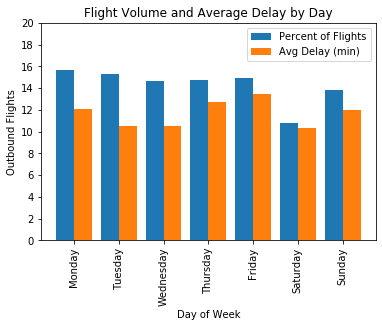

In [7]:
# Create plot from data frame

x = np.arange(len(day_out_df.index))  # the label locations
width = 0.40  # the width of the bars

# Create subplots for percent of flights for each day and average delay for each day
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, day_out_df["Flights"]/day_out_df["Flights"].sum()*100, width, label='Percent of Flights')
rects2 = ax.bar(x + width/2, day_out_df["AvgDelayMinutes"], width, label='Avg Delay (min)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Day of Week')
ax.set_ylabel('Outbound Flights')
ax.set_title('Flight Volume and Average Delay by Day')
ax.set_xticks(x)
ax.set_yticks(np.arange(22, step=2))
ax.set_xticklabels(day_out_df.index, rotation= 90)
ax.legend()

# Save figure (must be in same box)
plt.savefig("DelayByDay_Outbound.png", bbox_inches="tight")

In [8]:
# Create pivot table by airline with days as columns
airline_out_df = Outbound_filter_copy.pivot_table(index="Description",columns='DayOfWeek',values='DepDelayMinutes')
airline_out_df

# Put days in correct order
out_reorder_df = pd.DataFrame(airline_out_df, columns=["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
out_reorder_df

# Replace NaN with 0
outbound_df = out_reorder_df.fillna(0)
outbound_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Description,,,,,,,
Alaska Airlines Inc.,6.628571,3.935673,7.359756,5.263473,9.588235,3.984848,14.737500
Allegiant Air,8.353846,0.000000,11.333333,3.187500,25.033333,36.425000,14.714286
American Airlines Inc.,12.564639,14.212575,13.202236,11.628000,12.604790,11.745407,16.846818
Delta Air Lines Inc.,12.122671,9.700156,12.606436,15.130399,13.879902,9.438596,8.329746
Frontier Airlines Inc.,58.352941,27.767857,29.380952,25.320755,48.000000,31.857143,17.963636
Southwest Airlines Co.,11.069444,8.335500,8.796487,11.379901,11.636193,8.562402,10.456195
Spirit Air Lines,11.100000,6.906667,9.850299,10.350993,15.760234,14.052632,6.506757
United Air Lines Inc.,17.122034,17.267271,12.399513,18.307601,20.154118,14.375714,18.526786


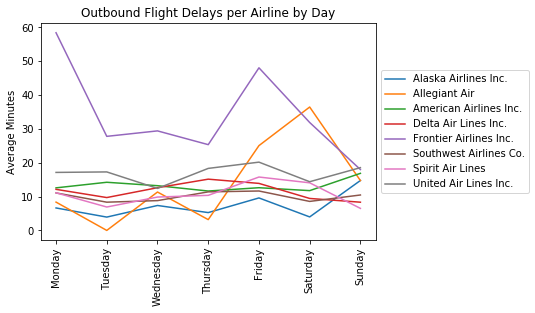

In [9]:
# Create variable with day keys for plot
days = outbound_df.keys()
days

# Plot each airline
Alaska, = plt.plot(days, outbound_df.loc['Alaska Airlines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Alaska Airlines Inc.")
Allegiant, = plt.plot(days, outbound_df.loc['Allegiant Air',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Allegiant Air")
American, = plt.plot(days, outbound_df.loc['American Airlines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "American Airlines Inc.")
Delta, = plt.plot(days, outbound_df.loc['Delta Air Lines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Delta Air Lines Inc.")
Frontier, = plt.plot(days, outbound_df.loc['Frontier Airlines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Frontier Airlines Inc.")
Southwest, = plt.plot(days, outbound_df.loc['Southwest Airlines Co.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Southwest Airlines Co.")
Spirit, = plt.plot(days, outbound_df.loc['Spirit Air Lines',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Spirit Air Lines")
United, = plt.plot(days, outbound_df.loc['United Air Lines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "United Air Lines Inc.")
plt.xticks(rotation='vertical')
plt.ylabel("Average Minutes")
plt.title("Outbound Flight Delays per Airline by Day")

# Create handles for each airline and place legend outside of box
plt.legend(handles=[Alaska,Allegiant,American,Delta,Frontier,Southwest,Spirit,United], loc='center left', 
                                                                                       bbox_to_anchor=(1, 0.5))
# Save figure (must be in same box)
plt.savefig("DelayByAirline_Outbound.png", bbox_inches="tight")

## Question 2 - Best day of week for delays - Inbound

In [10]:
# Choose columns for data frame
df_columns = merge_carrier[['Description','Dest','DayOfWeek','DepDelayMinutes']]

# Filter by inbound to MCI
Inbound_filter = df_columns.loc[(df_columns["Dest"]=="MCI") & (df_columns["DayOfWeek"] != 9),:]
Inbound_filter

carrier_in_groupby = Inbound_filter.groupby("Description")
carrier_in_groupby.count()

,Dest,DayOfWeek,DepDelayMinutes
Description,,,
Alaska Airlines Inc.,1173,1173,1141
Allegiant Air,211,211,211
American Airlines Inc.,6946,6946,6738
Delta Air Lines Inc.,7994,7994,7917
Frontier Airlines Inc.,246,246,243
Southwest Airlines Co.,18520,18520,17989
Spirit Air Lines,1175,1175,1162
United Air Lines Inc.,5959,5959,5808


In [11]:
# Make copy first
Inbound_filter_copy = Inbound_filter.copy()

# Replace numbers for day of week with names
Inbound_filter_copy['DayOfWeek'] = Inbound_filter_copy['DayOfWeek'].replace(
    {1: 'Monday', 2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday',7: 'Sunday'})
Inbound_filter_copy

,Description,Dest,DayOfWeek,DepDelayMinutes
0,United Air Lines Inc.,MCI,Thursday,38.0
1,United Air Lines Inc.,MCI,Thursday,60.0
2,United Air Lines Inc.,MCI,Thursday,11.0
3,Alaska Airlines Inc.,MCI,Friday,0.0
4,Alaska Airlines Inc.,MCI,Friday,0.0
...,...,...,...,...
84410,Allegiant Air,MCI,Friday,5.0
84411,Allegiant Air,MCI,Monday,0.0
84412,Allegiant Air,MCI,Monday,27.0
84413,Allegiant Air,MCI,Monday,0.0


In [12]:
# Group by day of week
day_in_groupby = Inbound_filter_copy.groupby(["DayOfWeek"])
day_in_groupby.count()

,Description,Dest,DepDelayMinutes
DayOfWeek,,,
Friday,6288,6288,6152
Monday,6636,6636,6521
Saturday,4435,4435,4336
Sunday,5972,5972,5827
Thursday,6233,6233,6083
Tuesday,6445,6445,6276
Wednesday,6215,6215,6014


In [13]:
# Create variables for data frame
flight_count = day_in_groupby["Dest"].count()
delay_avg = day_in_groupby["DepDelayMinutes"].sum()/flight_count

# Create data frame with flight count and average delay in minutes
day_df = pd.DataFrame({"Flights": flight_count,
                         "AvgDelayMinutes": delay_avg})

# Order days with reindex
day_in_df = day_df.reindex(["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
day_in_df
# Save table
# day_in_df.to_html("DelayByDay.html")

# day_in_df

,Flights,AvgDelayMinutes
DayOfWeek,,
Monday,6636,12.707655
Tuesday,6445,10.882389
Wednesday,6215,10.703298
Thursday,6233,13.873095
Friday,6288,13.613709
Saturday,4435,13.242390
Sunday,5972,13.670295


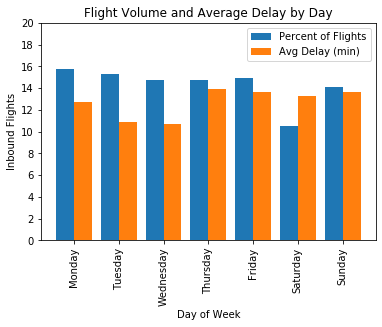

In [14]:
# Create plot from data frame

x = np.arange(len(day_in_df.index))  # the label locations
width = 0.40  # the width of the bars

# Create subplots for percent of flights for each day and average delay for each day
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, day_in_df["Flights"]/day_in_df["Flights"].sum()*100, width, label='Percent of Flights')
rects2 = ax.bar(x + width/2, day_in_df["AvgDelayMinutes"], width, label='Avg Delay (min)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Day of Week')
ax.set_ylabel('Inbound Flights')
ax.set_title('Flight Volume and Average Delay by Day')
ax.set_xticks(x)
ax.set_yticks(np.arange(22, step=2))
ax.set_xticklabels(day_in_df.index, rotation= 90)
ax.legend()

# Save figure (must be in same box)
plt.savefig("DelayByDay_Inbound.png", bbox_inches="tight")

In [15]:
# Create pivot table by airline with days as columns
airline_in_df = Inbound_filter_copy.pivot_table(index="Description",columns='DayOfWeek',values='DepDelayMinutes')
airline_in_df

# Put days in correct order
in_reorder_df = pd.DataFrame(airline_in_df, columns=["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"])
in_reorder_df

# Replace NaN with 0
inbound_df = in_reorder_df.fillna(0)
inbound_df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Description,,,,,,,
Alaska Airlines Inc.,6.931818,7.878049,5.875000,9.488235,10.758824,7.841667,8.849711
Allegiant Air,6.676923,0.000000,5.444444,4.125000,12.266667,17.725000,15.285714
American Airlines Inc.,12.294836,11.188435,11.328934,12.712713,16.135055,13.268698,16.580982
Delta Air Lines Inc.,12.599535,13.448466,10.394608,15.625828,14.495090,9.057751,10.159156
Frontier Airlines Inc.,51.117647,24.087719,32.952381,23.629630,33.647059,21.000000,16.857143
Southwest Airlines Co.,11.865819,9.716412,10.405842,13.630163,12.102033,12.937895,12.939754
Spirit Air Lines,9.822222,6.463576,7.125749,6.315789,11.261628,14.904762,5.046358
United Air Lines Inc.,19.075978,13.038813,15.089499,17.763314,17.010613,19.970845,21.824390


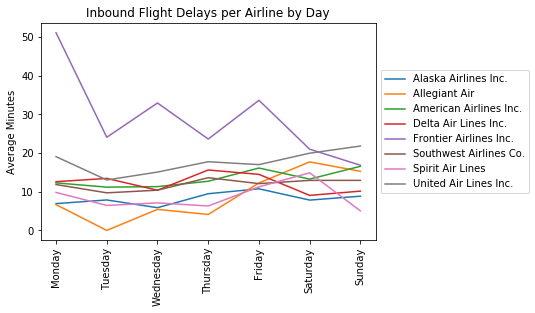

In [16]:
# Create variable with day keys for plot
days = inbound_df.keys()
days

# Plot each airline
Alaska, = plt.plot(days, inbound_df.loc['Alaska Airlines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Alaska Airlines Inc.")
Allegiant, = plt.plot(days, inbound_df.loc['Allegiant Air',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Allegiant Air")
American, = plt.plot(days, inbound_df.loc['American Airlines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "American Airlines Inc.")
Delta, = plt.plot(days, inbound_df.loc['Delta Air Lines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Delta Air Lines Inc.")
Frontier, = plt.plot(days, inbound_df.loc['Frontier Airlines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Frontier Airlines Inc.")
Southwest, = plt.plot(days, inbound_df.loc['Southwest Airlines Co.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Southwest Airlines Co.")
Spirit, = plt.plot(days, inbound_df.loc['Spirit Air Lines',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "Spirit Air Lines")
United, = plt.plot(days, inbound_df.loc['United Air Lines Inc.',["Monday","Tuesday", "Wednesday","Thursday","Friday",
                                                                    "Saturday","Sunday"]], label= "United Air Lines Inc.")
plt.xticks(rotation='vertical')
plt.ylabel("Average Minutes")
plt.title("Inbound Flight Delays per Airline by Day")

# Create handles for each airline and place legend outside of box
plt.legend(handles=[Alaska,Allegiant,American,Delta,Frontier,Southwest,Spirit,United], loc='center left', 
                                                                                       bbox_to_anchor=(1, 0.5))
# Save figure (must be in same box)
plt.savefig("DelayByAirline_Inbound.png", bbox_inches="tight")